In [33]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [34]:
X,y=make_regression(n_samples=100,n_features=2,n_informative=2,n_targets=1,noise=50)


In [35]:
df=pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})

In [36]:
df.shape

(100, 3)

In [37]:
df.head()

,feature1,feature2,target
0,0.104437,1.153099,-64.898441
1,0.910968,-0.805788,164.272283
2,0.953036,1.575503,18.921153
3,-0.837340,-0.249110,-147.593584
4,1.007931,1.358201,90.241418


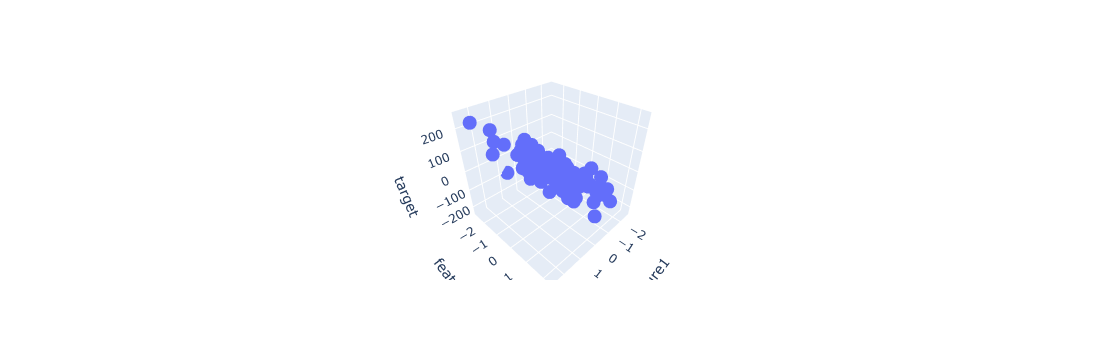

In [38]:
fig=px.scatter_3d(df,x='feature1',y='feature2',z='target')
fig.show()

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr=LinearRegression()

In [42]:
lr.fit(X_train,y_train)

LinearRegression()

In [43]:
y_pred=lr.predict(X_test)

In [44]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 44.23267853414448
MSE 3068.060602864279
R2 score 0.5388174439057117


In [45]:
lr.coef_

array([87.46345962,  9.14161129])

In [46]:
lr.intercept_

8.444472540753772

# multiple regression with calculation


In [76]:
import numpy as np
from sklearn.datasets import load_diabetes

In [77]:
X,y=load_diabetes(return_X_y=True)

In [78]:
X


array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [79]:
X.shape

(442, 10)

In [80]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [83]:
print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
reg=LinearRegression()

In [86]:
reg.fit(X_train,y_train)

LinearRegression()

In [87]:
y_pred=reg.predict(X_test)

In [88]:
r2_score(y_test,y_pred)

0.4399338661568968

In [89]:
reg.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [90]:
class MeraLR:
    def __init__(self):
        self.coef_=None
        self.intercept_=None

    def fit(self,X_train,y_train):
        X_train=np.insert(X_train,0,1,axis=1)

        betas=np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_=betas[0]
        self.coef_=betas[1:]

    def predict(self,X_test):
        y_pred=np.dot(X_test,self.coef_) + self.intercept_
        return y_pred
    

        

In [91]:
lr=MeraLR()

In [92]:
lr.fit(X_train,y_train)

In [93]:
X_train.shape

(353, 10)

In [94]:
np.insert(X_train,0,1,axis=1).shape

(353, 11)

In [95]:
y_pred=lr.predict(X_test)

In [96]:
r2_score(y_test,y_pred)

0.43993386615689756

In [97]:
lr.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [98]:
lr.intercept_

151.8833100525417